# Random Forest Exercises

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

import acquire
import prepare

## Acquire

In [2]:
# Acquire Step
df = acquire.get_titanic_data()
df.head(2)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0


## Prepare

In [3]:
# prepare the data
train, validate, test = prepare.prep_titanic_data(df)
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,0,1,36.000000,0,0,40.1250,1,1,0,0
165,1,3,9.000000,0,2,20.5250,0,1,0,1
50,0,3,7.000000,4,1,39.6875,0,1,0,1
259,1,2,50.000000,0,1,26.0000,0,0,0,1
306,1,1,29.678105,0,0,110.8833,1,0,0,0


In [4]:
X_train = train.drop(columns=["survived"])
y_train = train.survived

X_validate = validate.drop(columns=["survived"])
y_validate = validate.survived

X_test = test.drop(columns=["survived"])
y_test = test.survived

In [5]:
X_train.head()

,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,1,36.000000,0,0,40.1250,1,1,0,0
165,3,9.000000,0,2,20.5250,0,1,0,1
50,3,7.000000,4,1,39.6875,0,1,0,1
259,2,50.000000,0,1,26.0000,0,0,0,1
306,1,29.678105,0,0,110.8833,1,0,0,0


In [6]:
# check the shape
X_train.shape, X_validate.shape, X_test.shape

((498, 9), (214, 9), (179, 9))

## Explore
* Think back to your Explore lesson and ask questions you want to know about the data
* Make decisions on which varaibles to keep and which to discard
* Accomplish feature engineering to provide the model with new variables

## Onto Modeling
* First, we need to establish a base line. 
* With a classification model we can use the mode of the target variable.

In [7]:
#  mode for target?
y_train.mode()

0    0
Name: survived, dtype: int64

In [8]:
# Establish our baseline prediction 
baseline = y_train.mode()

# Next let establish a baseline accuracy
matches_baseline_prediction = y_train == 0

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline prediction: {baseline[0]}")
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline prediction: 0
Baseline accuracy: 0.62


In [9]:
# Make the model
forest1 = RandomForestClassifier(max_depth=10, random_state=123)

# Fit the model (on train and only train)
forest1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = forest1.predict(X_train)

# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of depth 10")
pd.DataFrame(report)

Tree of depth 10


,0,1,accuracy,macro avg,weighted avg
precision,0.953416,1.000000,0.96988,0.976708,0.971283
recall,1.000000,0.921466,0.96988,0.960733,0.969880
f1-score,0.976153,0.959128,0.96988,0.967640,0.969623
support,307.000000,191.000000,0.96988,498.000000,498.000000


In [10]:
# sklearn confusion matrix
cm = confusion_matrix(y_train, y_predictions)
print(cm)

[[307   0]
 [ 15 176]]


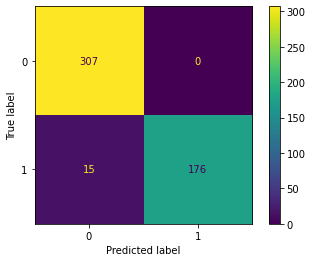

In [11]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest1.classes_)

disp.plot()
plt.show()

In [12]:
# We can create our own classification report with a bit more info
TN, FP, FN, TP = confusion_matrix(y_train,y_predictions).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN

(176, 307, 0, 15)

In [13]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.9698795180722891
True Positive Rate: 0.9214659685863874
False Positive Rate: 0.0
True Negative Rate: 1.0
False Negative Rate: 0.07853403141361257
Precision: 1.0
Recall: 0.9214659685863874
F1 Score: 0.9591280653950953
Support (0): 191
Support (1): 307


## We did it!
* We are machine learning experts and can retire to our island with lots of money....right?
* Maybe we should run our model against our validate set.

In [14]:
forest1.score(X_validate, y_validate)

0.8130841121495327

## Let's get loopy!

In [15]:
# Let's use a for loop to compare the accuracy off different depths
for i in range(2, 11):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = forest.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.810345    0.833333  0.817269    0.821839      0.819162
recall       0.918567    0.654450  0.817269    0.786509      0.817269
f1-score     0.861069    0.733138  0.817269    0.797103      0.812003
support    307.000000  191.000000  0.817269  498.000000    498.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.833333    0.858974  0.841365    0.846154      0.843168
recall       0.928339    0.701571  0.841365    0.814955      0.841365
f1-score     0.878274    0.772334  0.841365    0.825304      0.837643
support    307.000000  191.000000  0.841365  498.000000    498.000000

Tree with max depth of 4
                    0           1  accuracy   macro avg  weighted avg
precision    0.840580    0.888889  0.855422    0.864734      0.859108
recall       0.944625    0.712042  0.855422    0.828334      0.855422
f1-score     

## As we might expect
- The more depth to the tree, the more the model fits to the training data

In [16]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(2, 25):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first then check validate
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.817269,0.775701,0.041568
1,3,0.841365,0.785047,0.056319
2,4,0.855422,0.794393,0.061029
3,5,0.861446,0.808411,0.053035
4,6,0.893574,0.803738,0.089836
5,7,0.933735,0.817757,0.115978
6,8,0.945783,0.808411,0.137372
7,9,0.957831,0.803738,0.154093
8,10,0.969880,0.813084,0.156795
9,11,0.977912,0.817757,0.160155


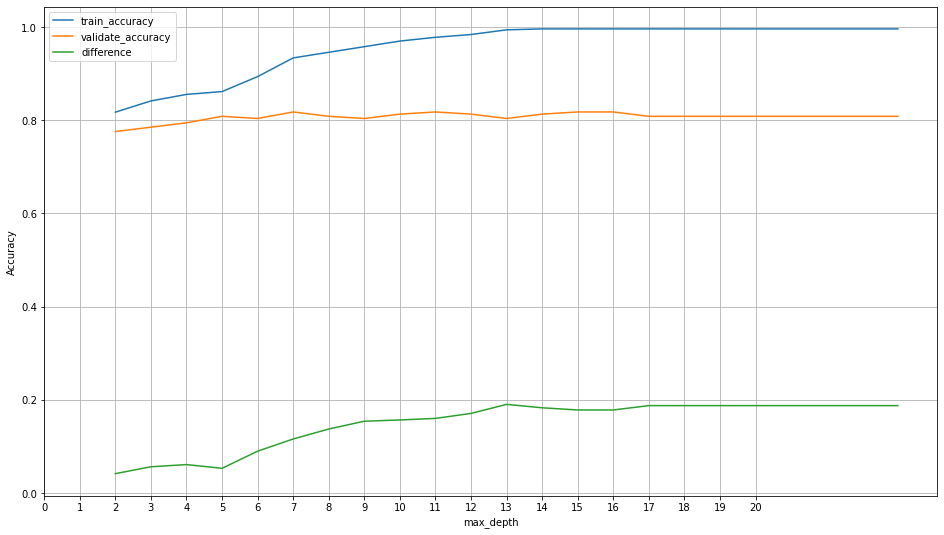

In [17]:
# Let's plot the different accuracies and differences
df.set_index('max_depth').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

## Increasing `min_samples_per_leaf`, decreasing `max_depth`

In [18]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = max_depth - i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,18,0.923695,0.822430,0.101265
1,3,17,0.905622,0.822430,0.083193
2,4,16,0.889558,0.813084,0.076474
3,5,15,0.883534,0.794393,0.089142
4,6,14,0.875502,0.799065,0.076437
5,7,13,0.871486,0.794393,0.077093
6,8,12,0.873494,0.794393,0.079101
7,9,11,0.855422,0.794393,0.061029
8,10,10,0.859438,0.789720,0.069718
9,11,9,0.853414,0.785047,0.068367


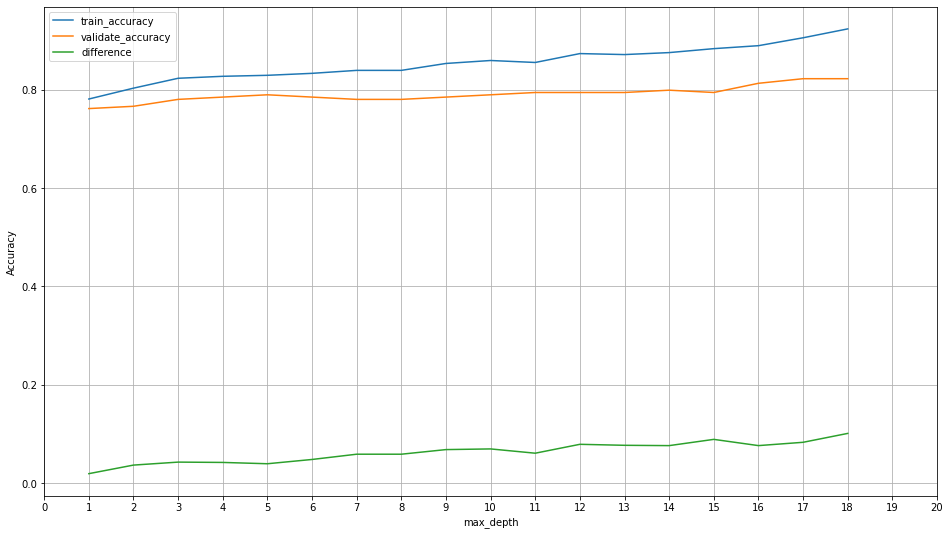

In [19]:
df.set_index('max_depth')[['train_accuracy', 'validate_accuracy','difference']].plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

## What if we increase both `min_samples_per_leaf` and `max_depth`

In [20]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,2,0.817269,0.775701,0.041568
1,3,3,0.845382,0.785047,0.060335
2,4,4,0.847390,0.794393,0.052997
3,5,5,0.859438,0.799065,0.060372
4,6,6,0.869478,0.803738,0.065740
5,7,7,0.865462,0.789720,0.075742
6,8,8,0.861446,0.789720,0.071726
7,9,9,0.855422,0.789720,0.065702
8,10,10,0.859438,0.789720,0.069718
9,11,11,0.851406,0.785047,0.066359


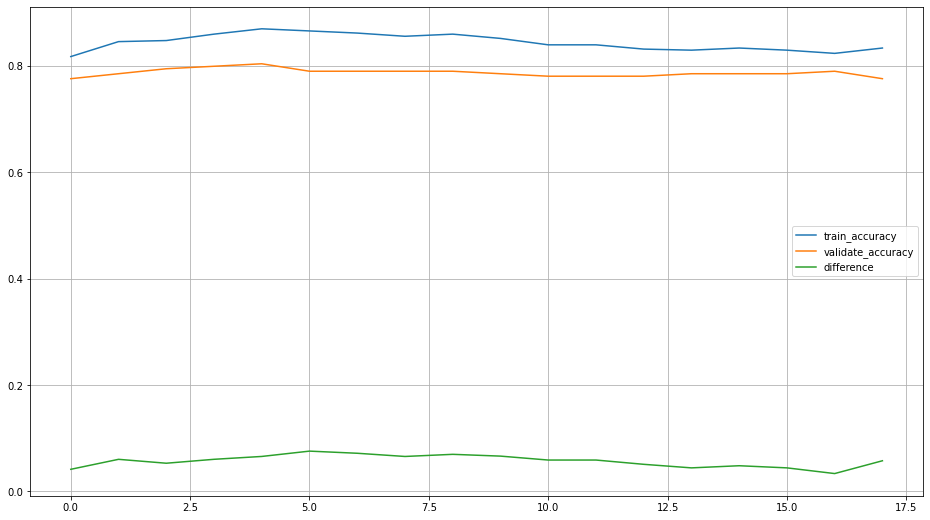

In [21]:
df[['train_accuracy', 'validate_accuracy','difference']].plot(figsize = (16,9))
plt.grid()

## What about a fixed depth and increasing `min_samples_leaf`

In [22]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []


for i in range(2, 50):
    # Make the model
    depth = 6
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,6,0.883534,0.813084,0.070450
1,3,6,0.881526,0.803738,0.077788
2,4,6,0.871486,0.799065,0.072421
3,5,6,0.867470,0.794393,0.073077
4,6,6,0.869478,0.803738,0.065740
5,7,6,0.865462,0.789720,0.075742
6,8,6,0.859438,0.785047,0.074391
7,9,6,0.855422,0.789720,0.065702
8,10,6,0.857430,0.789720,0.067710
9,11,6,0.849398,0.785047,0.064351


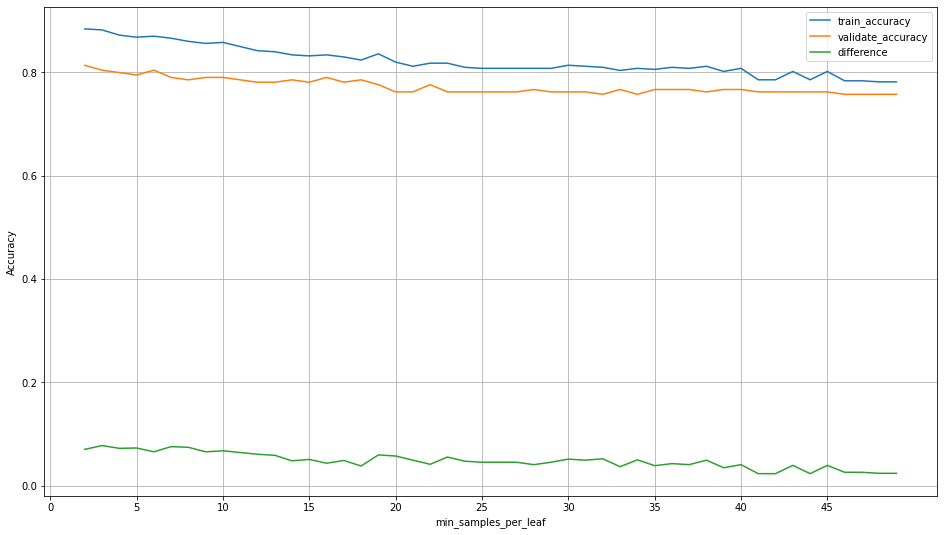

In [23]:
df.set_index('min_samples_per_leaf')[['train_accuracy', 'validate_accuracy', 'difference']].plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,50,5))
plt.grid()